In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams
%matplotlib inline

import pandas as pd
from sklearn.cluster import KMeans

read file


In [2]:
df = pd.read_csv('Datasets\combined_datasets.csv')

display records

In [3]:
df.head(5)

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,Shipping Eligibility,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,No FREE Shipping,men


display the shape and the size of the table

In [4]:
df.shape

(609, 9)

size

In [5]:
df.size

5481

pick the price column and choose a random sample of 200 elements then plot the sample

In [6]:
price = df['price']
len(price)

609

In [7]:
price

0      211.48
1      289.99
2      337.48
3      211.48
4      194.99
        ...  
604    575.99
605    564.98
606    262.98
607    115.49
608    960.49
Name: price, Length: 609, dtype: float64

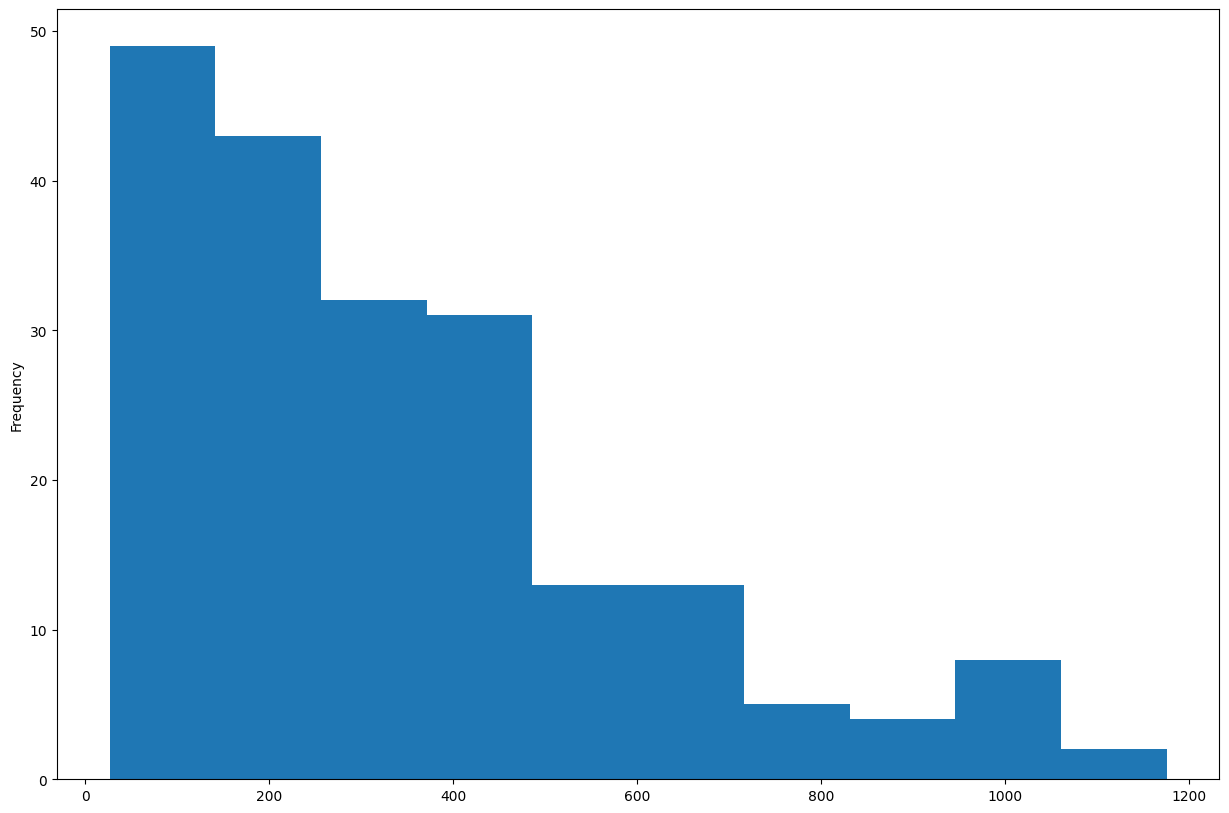

In [8]:
sample = price.sample(200)
sample.plot.hist(figsize=(15,10));

rating column 

In [9]:
rating = df['rating']
len(rating)

609

In [10]:
rating

0      100.0
1       88.0
2        NaN
3       80.0
4        NaN
       ...  
604     92.0
605     76.0
606     94.0
607     86.0
608      NaN
Name: rating, Length: 609, dtype: float64

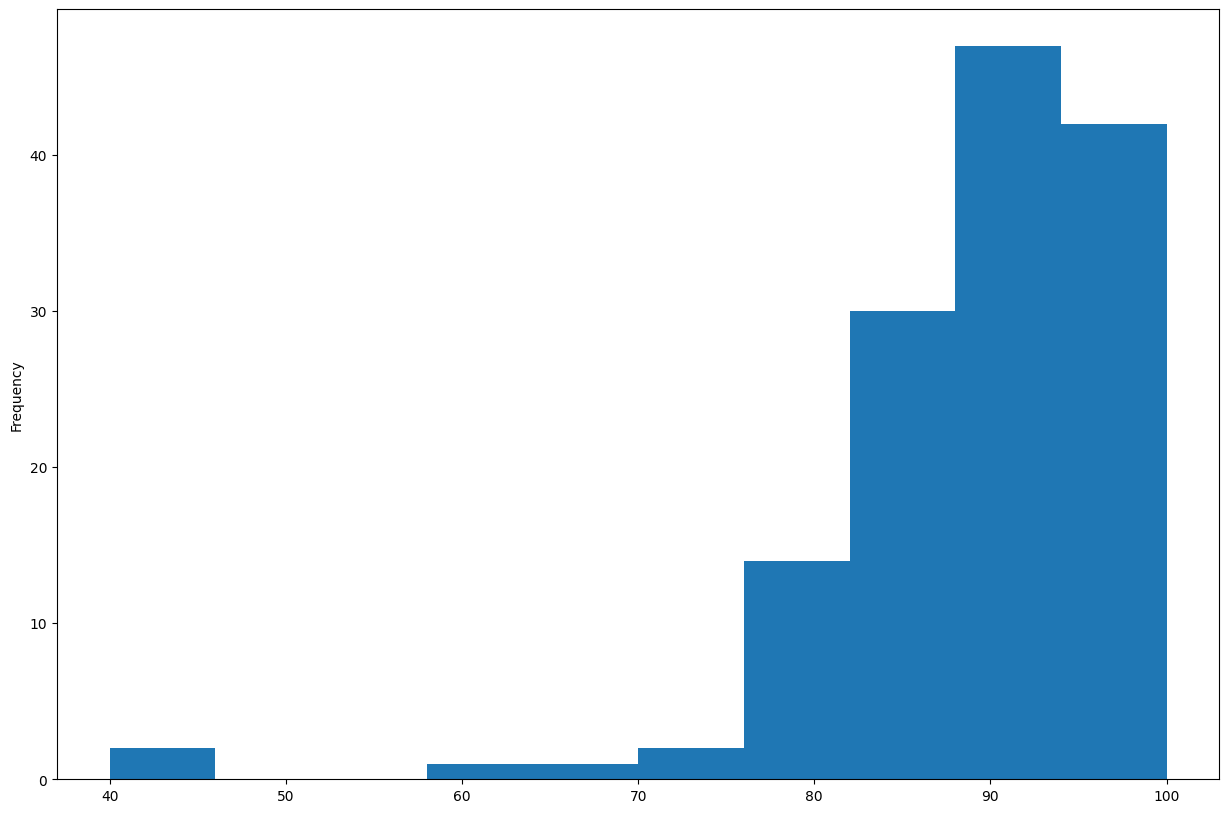

In [11]:
sample = rating.sample(200)
sample.plot.hist(figsize=(15,10));

missing values.

In [12]:
df.isnull().sum()

Unnamed: 0                0
category                  0
product                   0
Original_price           26
price                     0
perc_of_unit_sold        87
rating                  182
Shipping Eligibility     42
gender                   28
dtype: int64

In [13]:
df.head(5)

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,Shipping Eligibility,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,No FREE Shipping,men


filling the null value.

In [14]:
df.isna().sum()

Unnamed: 0                0
category                  0
product                   0
Original_price           26
price                     0
perc_of_unit_sold        87
rating                  182
Shipping Eligibility     42
gender                   28
dtype: int64

In [15]:
Median = df['rating'].median()
df['rating'].fillna(Median, inplace=True)

Median_Of_Original_Price = df['Original_price'].median()
df['Original_price'].fillna(Median_Of_Original_Price, inplace=True)

Perc_of_unit_sold_Median = df['perc_of_unit_sold'].median()
df['perc_of_unit_sold'].fillna(Perc_of_unit_sold_Median, inplace=True)

In [16]:
df.isna().sum()

Unnamed: 0               0
category                 0
product                  0
Original_price           0
price                    0
perc_of_unit_sold        0
rating                   0
Shipping Eligibility    42
gender                  28
dtype: int64

In [17]:
df['gender'].fillna(value='Unisex',inplace=True)
df

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,Shipping Eligibility,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,No FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,No FREE Shipping,men


In [18]:
df.isna().sum()

Unnamed: 0               0
category                 0
product                  0
Original_price           0
price                    0
perc_of_unit_sold        0
rating                   0
Shipping Eligibility    42
gender                   0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

Unnamed: 0              0
category                0
product                 0
Original_price          0
price                   0
perc_of_unit_sold       0
rating                  0
Shipping Eligibility    0
gender                  0
dtype: int64

### Check Duplicates

In [21]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])
print("Duplicate rows:") 
print(duplicate_rows)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, category, product, Original_price, price, perc_of_unit_sold, rating, Shipping Eligibility, gender]
Index: []


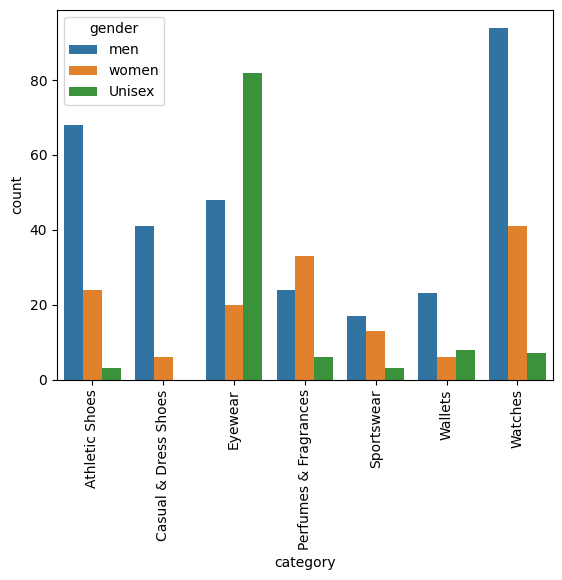

In [22]:
sb.countplot(data = df, x = 'category', hue = 'gender')
plt.xticks(rotation=90);

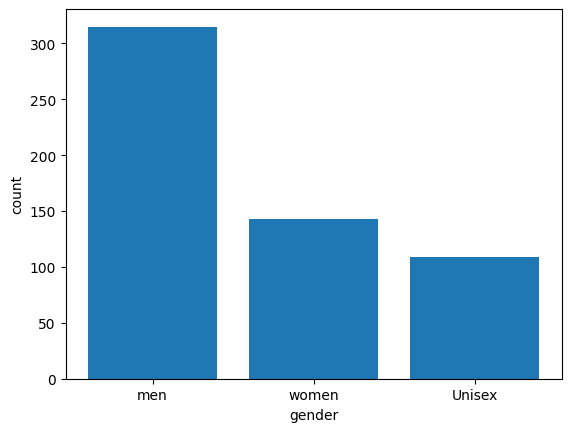

In [23]:
x = df['gender'].value_counts(sort=False).index

y = df['gender'].value_counts(sort=False)

plt.bar(x, y)

plt.xlabel('gender')
plt.ylabel('count')

plt.show()

### Checking for Incorrect Data in Rating

In [24]:
if any(df['rating'] > 100):
  print("There is a value above 100")
else:
  print("Nothing above 100")

Nothing above 100


# Clustering

In [25]:
df['Shipping Eligibility']

0         FREE Shipping
1         FREE Shipping
2         FREE Shipping
3         FREE Shipping
4      No FREE Shipping
             ...       
604       FREE Shipping
605       FREE Shipping
606       FREE Shipping
607    No FREE Shipping
608       FREE Shipping
Name: Shipping Eligibility, Length: 567, dtype: object

In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

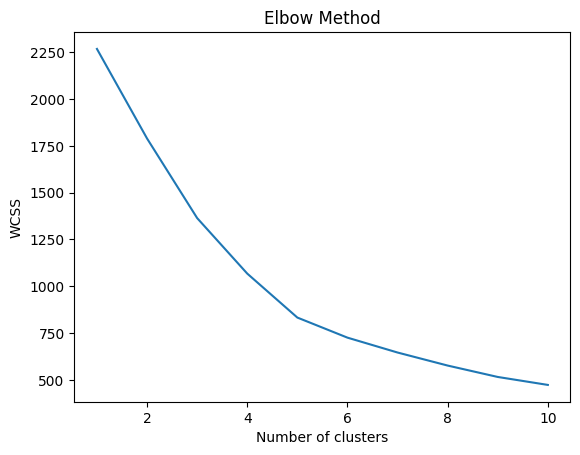

C:\Users\moham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='price', ylabel='perc_of_unit_sold'>

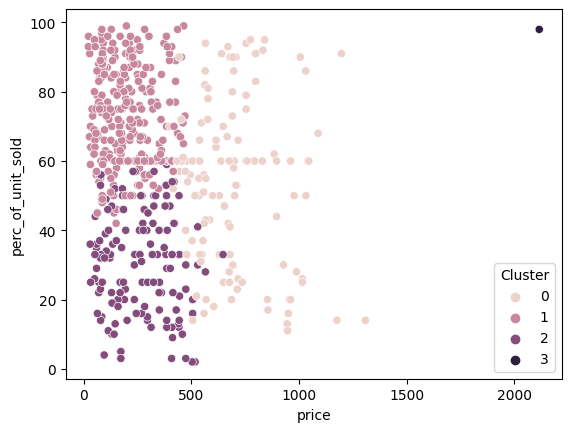

In [27]:
# Select the features to be used in clustering
X = df[['Original_price', 'price', 'perc_of_unit_sold', 'rating']]

# X = df[['Shipping Eligibility','price']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Visualize the clusters
sns.scatterplot(x='price', y='perc_of_unit_sold', hue='Cluster', data=df)


<Axes: xlabel='Original_price', ylabel='rating'>

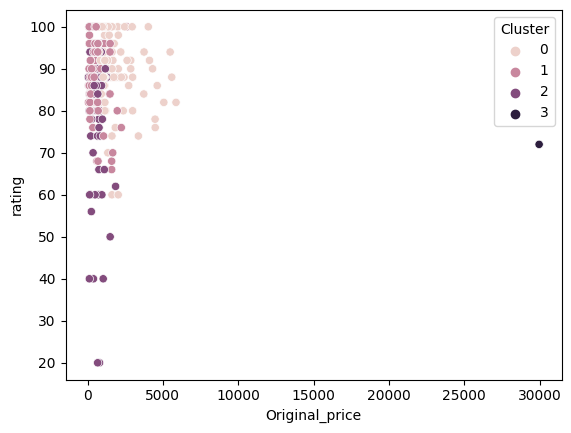

In [28]:
sns.scatterplot(x='Original_price', y='rating', hue='Cluster', data=df)

In [29]:
df

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,Shipping Eligibility,gender,Cluster
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men,1
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men,1
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,88.0,FREE Shipping,women,1
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men,1
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,88.0,No FREE Shipping,men,1
...,...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men,0
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women,2
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men,1
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,No FREE Shipping,men,2


In [30]:
print(df.dtypes)

Unnamed: 0                int64
category                 object
product                  object
Original_price          float64
price                   float64
perc_of_unit_sold       float64
rating                  float64
Shipping Eligibility     object
gender                   object
Cluster                   int32
dtype: object


# Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])

In [32]:
# exclude non-numeric columns
numeric_cols = ['price', 'rating']
cluster_stats = df[numeric_cols + ['Cluster']].groupby('Cluster').mean()

print(cluster_stats)


               price     rating
Cluster                        
0         682.570240  90.304000
1         206.714257  89.581081
2         261.129586  82.951724
3        2115.490000  72.000000


In [33]:
revenue_by_cluster = df.groupby('Cluster')['price'].sum()
print(revenue_by_cluster)

Cluster
0    85321.28
1    61187.42
2    37863.79
3     2115.49
Name: price, dtype: float64


In [34]:
# Import the LabelEncoder class from the sklearn library
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Shipping Eligibility' column
df['Shipping Eligibility'] = label_encoder.fit_transform(df['Shipping Eligibility'])

# Encode the 'gender' column
df['gender'] = label_encoder.fit_transform(df['gender'])

# Encode the 'category' column
df['category'] = label_encoder.fit_transform(df['category'])

# Encode the 'product' column
df['product'] = label_encoder.fit_transform(df['product'])


In [35]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
cluster_means = df.groupby('Cluster').mean()

# Print the result
print(cluster_means)

         Unnamed: 0  category     product  Original_price        price   
Cluster                                                                  
0         80.464000  4.440000  265.264000     1656.626400   682.570240  \
1         50.236486  2.439189  270.260135      460.837838   206.714257   
2         57.779310  2.910345  310.386207      540.809655   261.129586   
3         66.000000  6.000000  223.000000    29970.000000  2115.490000   

         perc_of_unit_sold     rating  Shipping Eligibility    gender  
Cluster                                                                
0                53.544000  90.304000              0.000000  1.088000  
1                72.216216  89.581081              0.510135  1.097973  
2                31.234483  82.951724              0.413793  0.958621  
3                98.000000  72.000000              0.000000  1.000000  
